# Libraries imported by notebook

In [56]:
%matplotlib notebook
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import analysis
from analysis import *
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from scipy import signal
import csv
import random
from scipy.stats import kurtosis,entropy
import seaborn as sns
from tqdm.notebook import tqdm

# Importing and Processing Data

## Processing Functions

In [3]:
def get_filt(fs,cutoff,order):
    nyq = 0.5 *fs
    normal_cutoff = cutoff / nyq
    return signal.butter(order, normal_cutoff,btype='low', analog=False)   

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a


def filt(sig,b,a):
    return signal.filtfilt(b,a,sig)
def decimate(sig):
    return signal.decimate(sig,2)
def decimate4(sig):
    return signal.decimate(sig,4)
def scale_data(sig):
    s_min = np.min(sig)
    s_max = np.max(sig)
    s_mean= np.mean(sig)
    std = (sig - s_min) / (s_max - s_min)
#     scaled = std * (s_max - s_min) + s_min
    return std

def detrend(sig):
    return signal.detrend(sig)


In [2985]:
test=np.ones(6000)
filt(test,b,a)

array([4.49805690e-12, 4.67120235e-12, 4.83996259e-12, ...,
       4.15633635e-14, 5.47352485e-14, 6.76706845e-14])

### Pipeline for filtering

In [4]:
def filt_pipeline(sig,b,a,period=375):
    sig=scale_data(sig)
    sig=signal.resample(sig,period)
    sig=filt(sig,b,a)
    return sig

## Import MIMIC Data

In [5]:
labels_1 = pd.read_csv("Annotations_1.txt",sep=" ",index_col = 0 )
Data_1  = pd.read_pickle("MIMIC_subset.pkl")
labels_2 = pd.read_csv("Annotations_2.txt",sep=" ",index_col = 0 )
Data_2  = pd.read_pickle("MIMIC_subset_2.pkl")

MIMIC_labels = pd.concat([labels_1,labels_2])
MIMIC_Raw_Data = pd.concat([Data_1,Data_2],axis=1)

### Filter MIMIC Data

In [6]:
fs=125
cutoff=10
lowcut=0.5
highcut=30
# b, a = get_filt(fs,cutoff,order)
b, a = butter_bandpass(lowcut, highcut, fs, order=4)
MIMIC_Filtered_Data = MIMIC_Raw_Data.apply(filt_pipeline, args=(b,a))
MIMIC_Detrended_Data = MIMIC_Filtered_Data.apply(detrend)

In [7]:
MIMIC_Detrended_Data.columns=["MIMIC_{}".format(i) for i in range(len(MIMIC_Detrended_Data.columns))]
MIMIC_Raw_Data.columns=["MIMIC_{}".format(i) for i in range(len(MIMIC_Raw_Data.columns))]
MIMIC_Filtered_Data.columns=["MIMIC_{}".format(i) for i in range(len(MIMIC_Raw_Data.columns))]
MIMIC_labels.index=["MIMIC_{}".format(i) for i in range(len(MIMIC_labels.index))]

In [8]:
MIMIC_A_labels = [index for index in MIMIC_labels.index if(MIMIC_labels.loc[index]["Label"]=="A")]
MIMIC_B_labels = [index for index in MIMIC_labels.index if(MIMIC_labels.loc[index]["Label"]=="B")]
MIMIC_C_labels = [index for index in MIMIC_labels.index if(MIMIC_labels.loc[index]["Label"]=="C")]
MIMIC_D_labels = [index for index in MIMIC_labels.index if(MIMIC_labels.loc[index]["Label"]!="A") and (MIMIC_labels.loc[index]["Label"]!="B") and (MIMIC_labels.loc[index]["Label"]!="C")]
print(MIMIC_D_labels)

[]


<IPython.core.display.Javascript object>


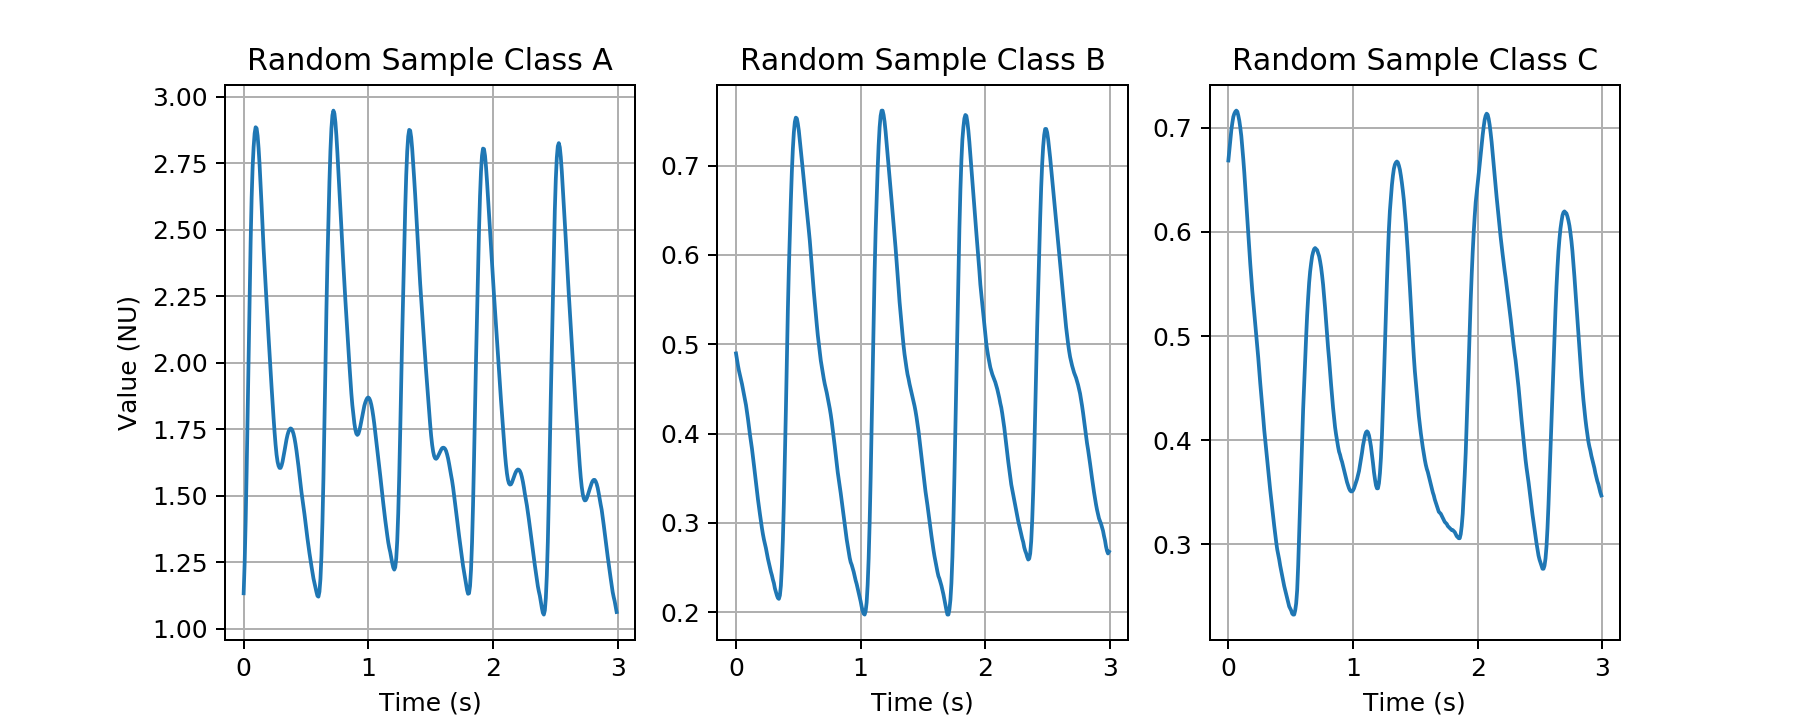

In [9]:
random_A=random.sample(MIMIC_A_labels,1)
random_B=random.sample(MIMIC_B_labels,1)
random_C=random.sample(MIMIC_C_labels,1)
x=np.arange(0.0,3.0,1/125)
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title("Random Sample Class A")
plt.plot(x,MIMIC_Raw_Data[random_A].values)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Value (NU)")
plt.subplot(1,3,2)
plt.title("Random Sample Class B")
plt.plot(x,MIMIC_Raw_Data[random_B].values)
plt.grid()
plt.xlabel("Time (s)")

plt.subplot(1,3,3)
plt.title("Random Sample Class C")
plt.plot(x,MIMIC_Raw_Data[random_C].values)
plt.grid()
plt.xlabel("Time (s)")

plt.show()

## Import Vietnam

In [10]:
Vietnam_labels = pd.read_csv("Annotations_Vietnam.txt",sep=" ",index_col = 0 )
Vietnam_Raw_Data  = pd.read_pickle("Vietnam_subset.pkl")

### Filter Vietnam

In [12]:
fs=100
cutoff=10
order=6

lowcut=0.5
highcut=30

#b, a = get_filt(fs,cutoff,order)
b, a = butter_bandpass(lowcut, highcut, fs, order=4)
Vietnam_Filtered_Data = Vietnam_Raw_Data.apply(filt_pipeline, args=(b,a))
Vietnam_Detrended_Data = Vietnam_Filtered_Data.apply(detrend)

In [13]:
Vietnam_A_labels = [index for index in Vietnam_labels.index if(Vietnam_labels.loc[index]["Label"]=="A")]
Vietnam_B_labels = [index for index in Vietnam_labels.index if(Vietnam_labels.loc[index]["Label"]=="B")]
Vietnam_C_labels = [index for index in Vietnam_labels.index if(Vietnam_labels.loc[index]["Label"]=="C")]
Vietnam_D_labels = [index for index in Vietnam_labels.index if(Vietnam_labels.loc[index]["Label"]!="A") and (Vietnam_labels.loc[index]["Label"]!="B") and (Vietnam_labels.loc[index]["Label"]!="C")]
print(Vietnam_D_labels)

[]


<IPython.core.display.Javascript object>


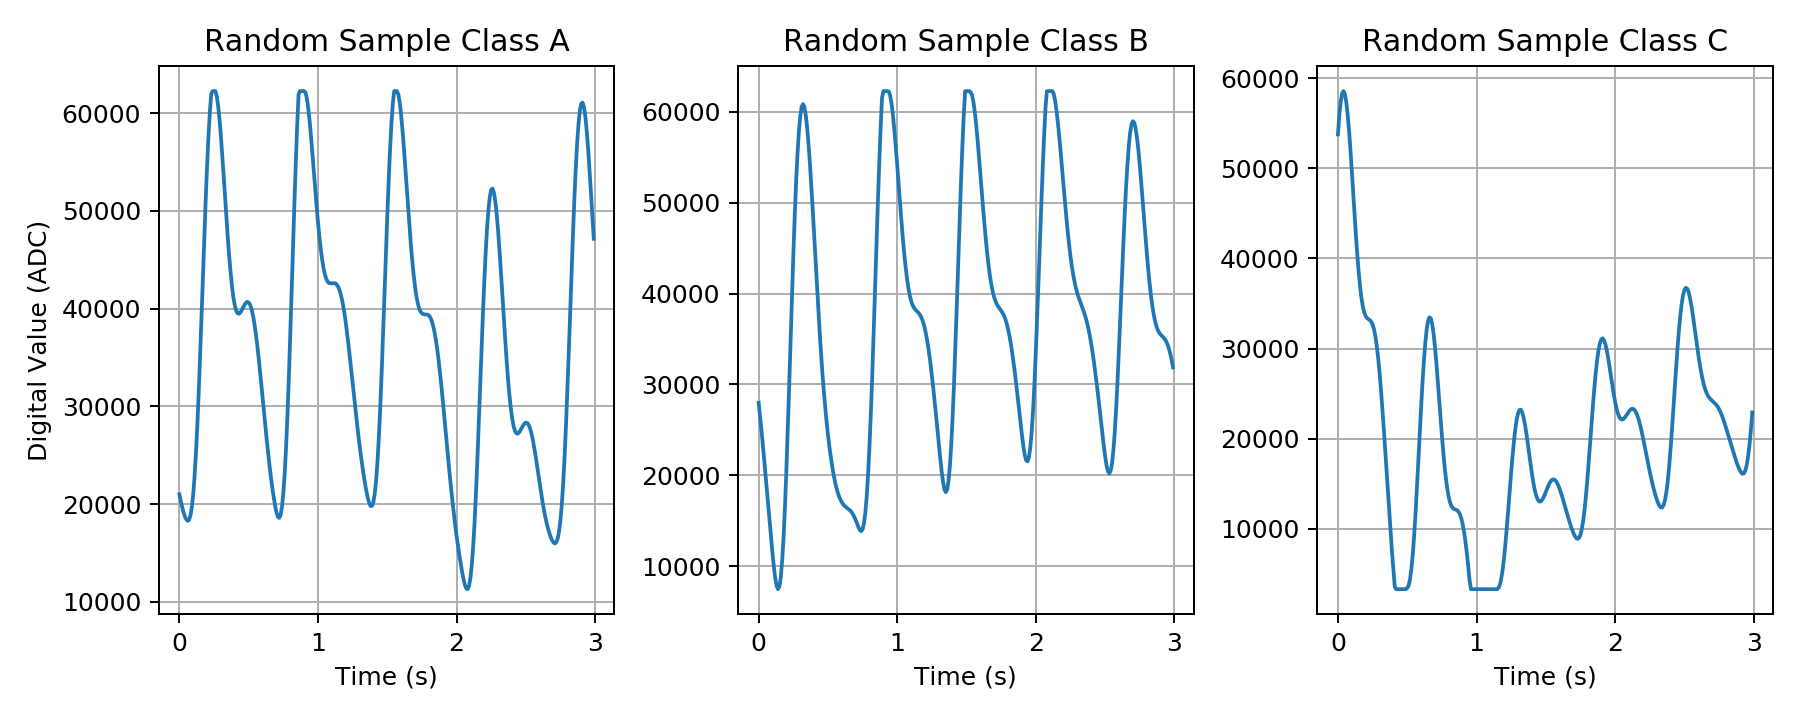

In [14]:
random_A=random.sample(Vietnam_A_labels,1)
random_B=random.sample(Vietnam_B_labels,1)
random_C=random.sample(Vietnam_C_labels,1)
x=np.arange(0.0,3.0,1/100)
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title("Random Sample Class A")
plt.plot(x,Vietnam_Raw_Data[random_A].values)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Digital Value (ADC)")
plt.subplot(1,3,2)
plt.title("Random Sample Class B")
plt.plot(x,Vietnam_Raw_Data[random_B].values)
plt.grid()
plt.xlabel("Time (s)")

plt.subplot(1,3,3)
plt.title("Random Sample Class C")
plt.plot(x,Vietnam_Raw_Data[random_C].values)
plt.grid()
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


## Import AFE Data

### Omar Data

In [15]:
Omar_Raw_Data = pd.read_pickle("AFE_raw_data.pkl")
Omar_labels = pd.read_csv("Omar_Annotations_Full.txt",sep=" ",index_col = 0 )
new_names = ["Omar_{}".format(i) for i in range(331)]
Omar_labels.index =new_names
Omar_Raw_Data.columns=new_names
print(Omar_Raw_Data.shape)

(750, 331)


### Filter Omar Data

In [16]:
fs=250
cutoff=10
order=6

lowcut=0.5
highcut=30

b, a = get_filt(fs,cutoff,order)
b, a = butter_bandpass(lowcut, highcut, fs, order=4)

Omar_Filtered_Data = Omar_Raw_Data.apply(filt_pipeline, args=(b,a))
Omar_Detrended_Data = Omar_Filtered_Data.apply(detrend)

['Omar_247']


<IPython.core.display.Javascript object>


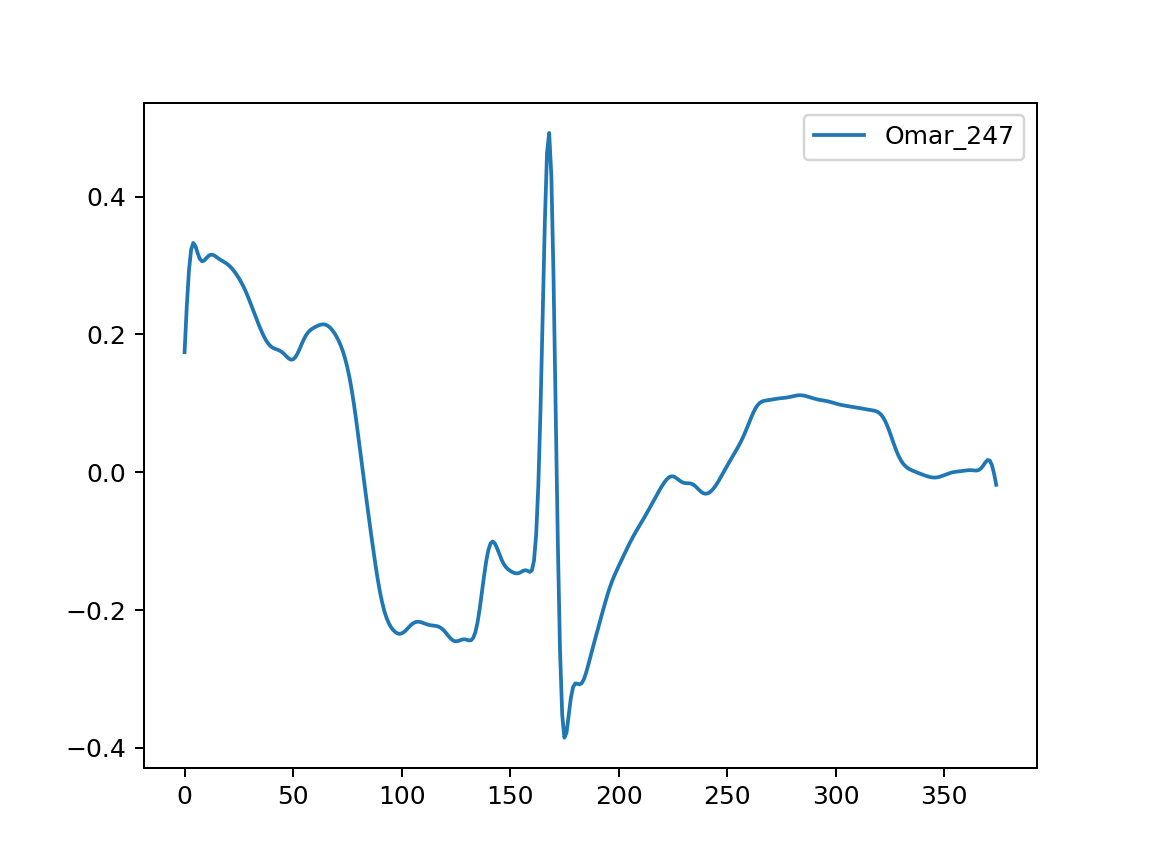

In [17]:
rand_sample = random.sample(list(Omar_Detrended_Data.columns),1)
print(rand_sample)
Omar_Filtered_Data[rand_sample].plot()
plt.show()

In [18]:
Omar_Filtered_Data.to_pickle("Omar_Filtered_Data.pkl")

### Stefan Data

In [19]:
Stefan_Data = pd.read_pickle("Stefan_Raw_data.pkl")
Stefan_Data_2 = pd.read_pickle("Stefan_segments_2.pkl")
Stefan_labels = pd.read_csv("Stefan_Annotations_Full_New.txt",sep=" ",index_col = 0 )
Stefan_Raw_Data = pd.concat([Stefan_Data,Stefan_Data_2],axis=1)
print(Stefan_Raw_Data.shape)

(1500, 135)


### Filter Stefan Data

In [20]:
fs=500
cutoff=10
order=6
# b, a = get_filt(fs,cutoff,order)

lowcut=0.5
highcut=30

b, a = get_filt(fs,cutoff,order)
b, a = butter_bandpass(lowcut, highcut, fs, order=4)

Stefan_Filtered_Data = Stefan_Raw_Data.apply(filt_pipeline, args=(b,a))
Stefan_Filtered_Data.to_pickle("Stefan_Full_Filtered.pkl")

### Merging Data

In [21]:
AFE_Raw_Data=pd.concat([Omar_Raw_Data,Stefan_Raw_Data],axis=1)

AFE_Filtered_Data = pd.concat([Omar_Filtered_Data,Stefan_Filtered_Data],axis=1)
AFE_labels = pd.concat([Omar_labels,Stefan_labels])

new_names = ["AFE_{}".format(i) for i in range(AFE_labels.shape[0])]
AFE_Filtered_Data.columns=new_names
AFE_Raw_Data.columns=new_names
AFE_Detrended_Data = AFE_Filtered_Data.apply(detrend)

In [22]:
AFE_A_labels = [index for index in AFE_labels.index if(AFE_labels.loc[index]["Label"]=="A")]
AFE_B_labels = [index for index in AFE_labels.index if(AFE_labels.loc[index]["Label"]=="B")]
AFE_C_labels = [index for index in AFE_labels.index if(AFE_labels.loc[index]["Label"]=="C")]
AFE_D_labels = [index for index in AFE_labels.index if(AFE_labels.loc[index]["Label"]!="A") and (AFE_labels.loc[index]["Label"]!="B") and (AFE_labels.loc[index]["Label"]!="C")]
print(AFE_D_labels)

[]


A:  ['AFE_248']
B:  ['AFE_23']
C:  ['AFE_76']


<IPython.core.display.Javascript object>


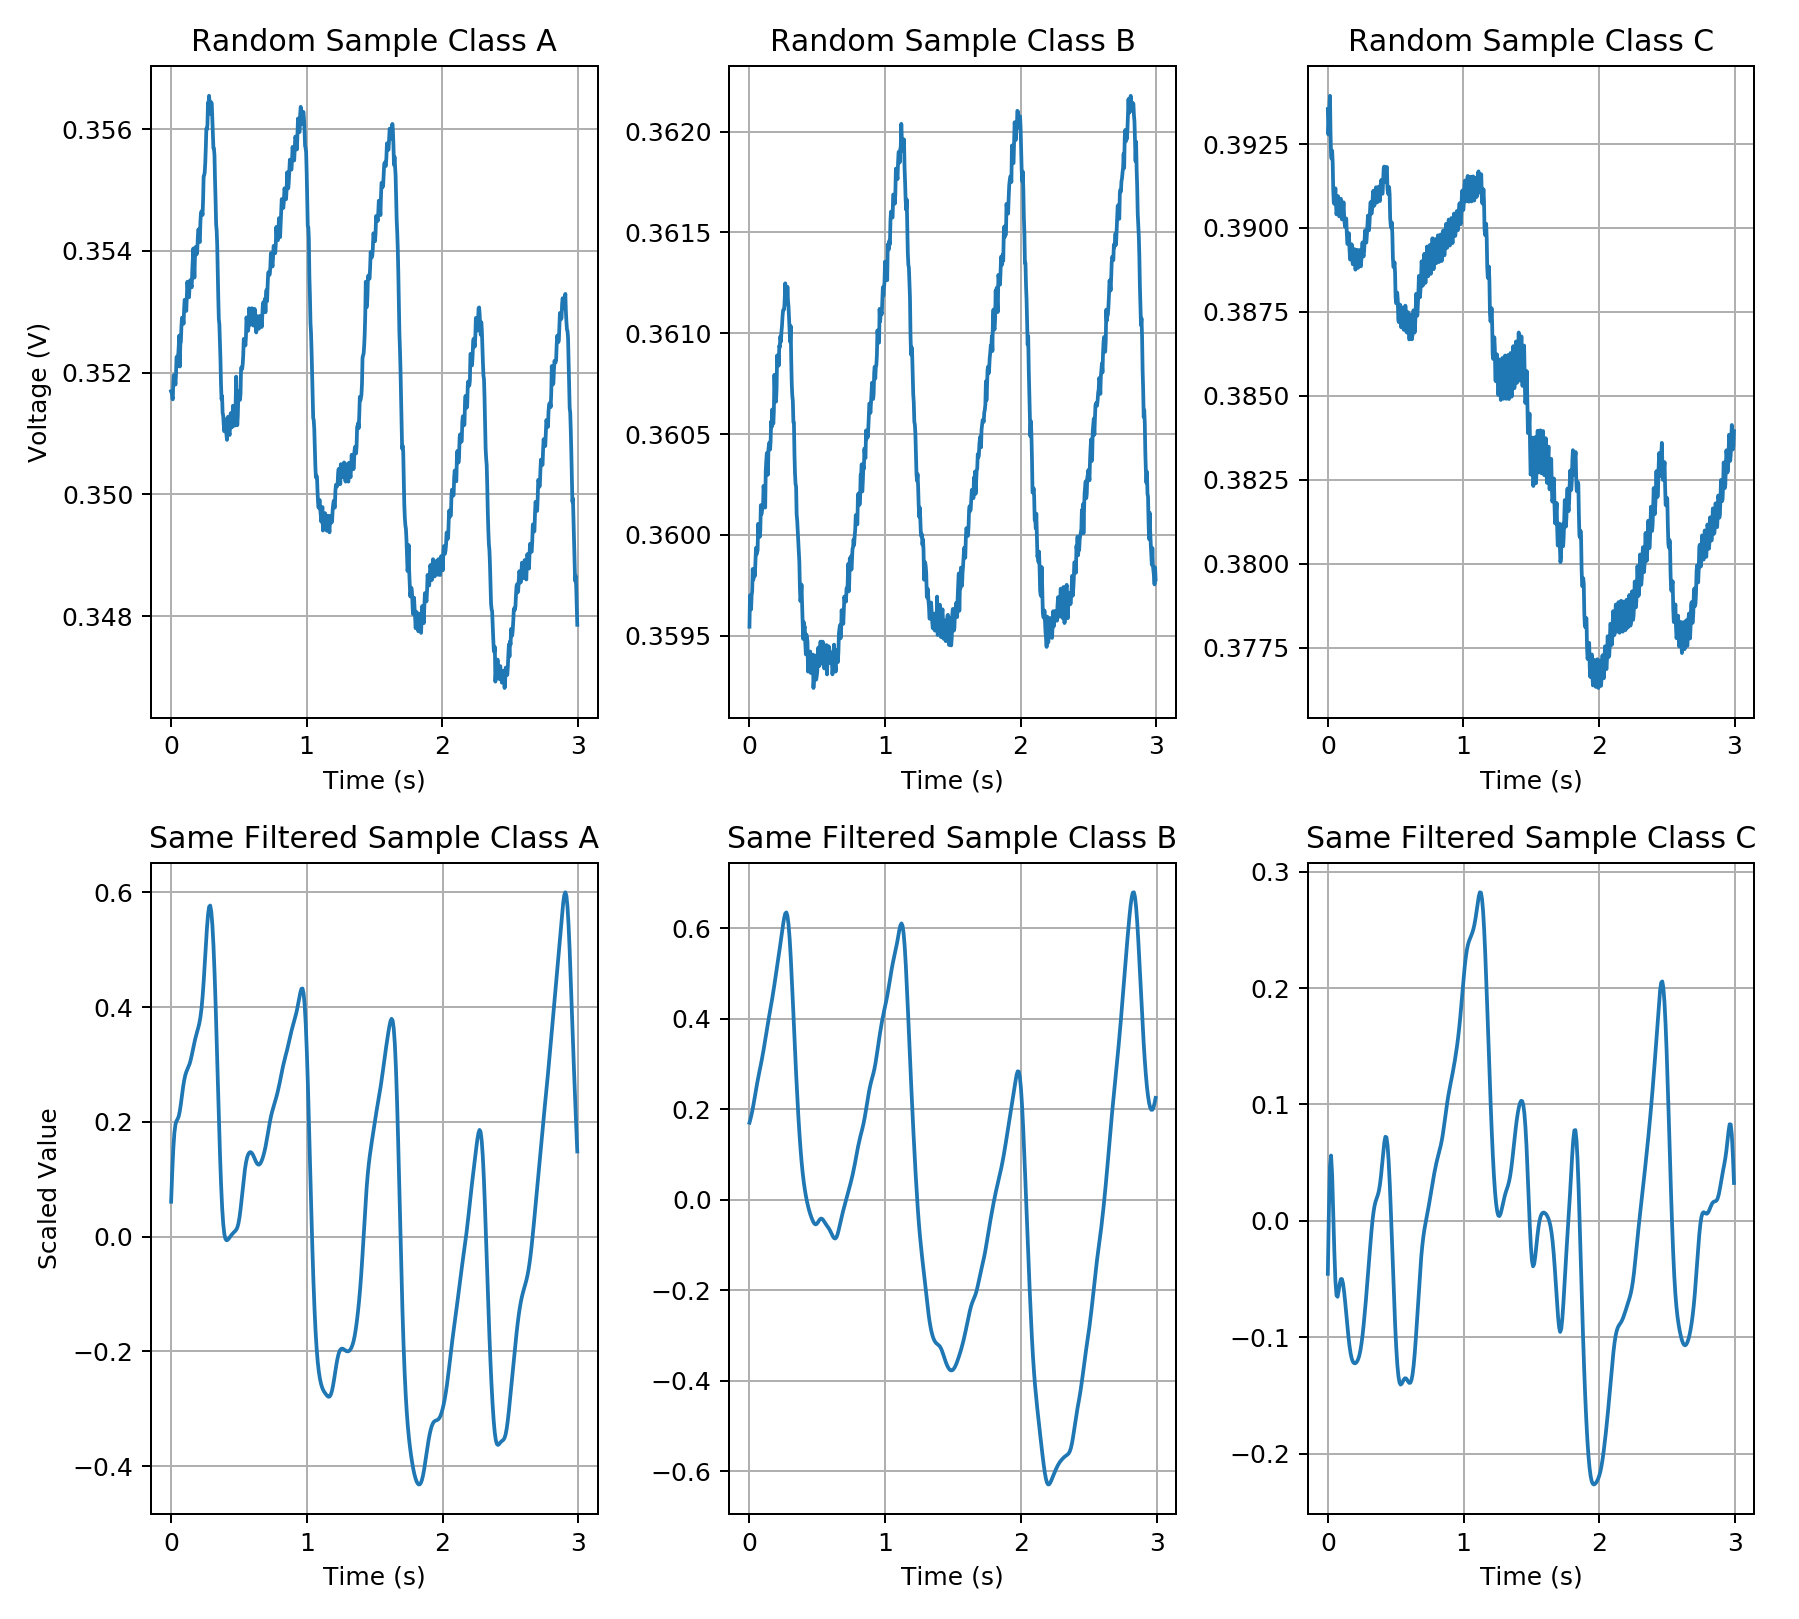

In [23]:
random_A=random.sample(AFE_A_labels,1)
random_B=random.sample(AFE_B_labels,1)
random_C=random.sample(AFE_C_labels,1)
print("A: ",random_A)
print("B: ",random_B)
print("C: ",random_C)
x=np.arange(0.0,3.0,1/250)
plt.figure(figsize=(10,9))
plt.subplot(2,3,1)
plt.title("Random Sample Class A")
maskA=AFE_Raw_Data[random_A].notna()
# print("A shape: ",All_AFE_Data[random_A][maskA])
plt.plot(x,AFE_Raw_Data[random_A][maskA.values])
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.subplot(2,3,2)
plt.title("Random Sample Class B")
maskB=AFE_Raw_Data[random_B].notna()
shape2=AFE_Raw_Data[random_B][maskB.values].shape[0]
x2=np.arange(0.0,3.0,1/(shape2/3))
plt.plot(x2,AFE_Raw_Data[random_B][maskB.values])
plt.grid()
plt.xlabel("Time (s)")

plt.subplot(2,3,3)
maskC=AFE_Raw_Data[random_C].notna()
shape3=AFE_Raw_Data[random_C][maskC.values].shape[0]
x3=np.arange(0.0,3.0,1/(shape3/3))

plt.title("Random Sample Class C")
plt.plot(x3,AFE_Raw_Data[random_C][maskC.values].values)
plt.grid()
plt.xlabel("Time (s)")
x3=np.arange(0.0,3.0,1/125)
plt.subplot(2,3,4)
plt.title("Same Filtered Sample Class A")
plt.plot(x3,AFE_Filtered_Data[random_A])
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Scaled Value")

plt.subplot(2,3,5)
plt.title("Same Filtered Sample Class B")
plt.plot(x3,AFE_Filtered_Data[random_B])
plt.grid()
plt.xlabel("Time (s)")

plt.subplot(2,3,6)
plt.title("Same Filtered Sample Class C")
plt.plot(x3,AFE_Filtered_Data[random_C])
plt.grid()
plt.xlabel("Time (s)")

plt.tight_layout()
plt.show()


['MIMIC_519']
['0_1390']
['AFE_190']


<IPython.core.display.Javascript object>


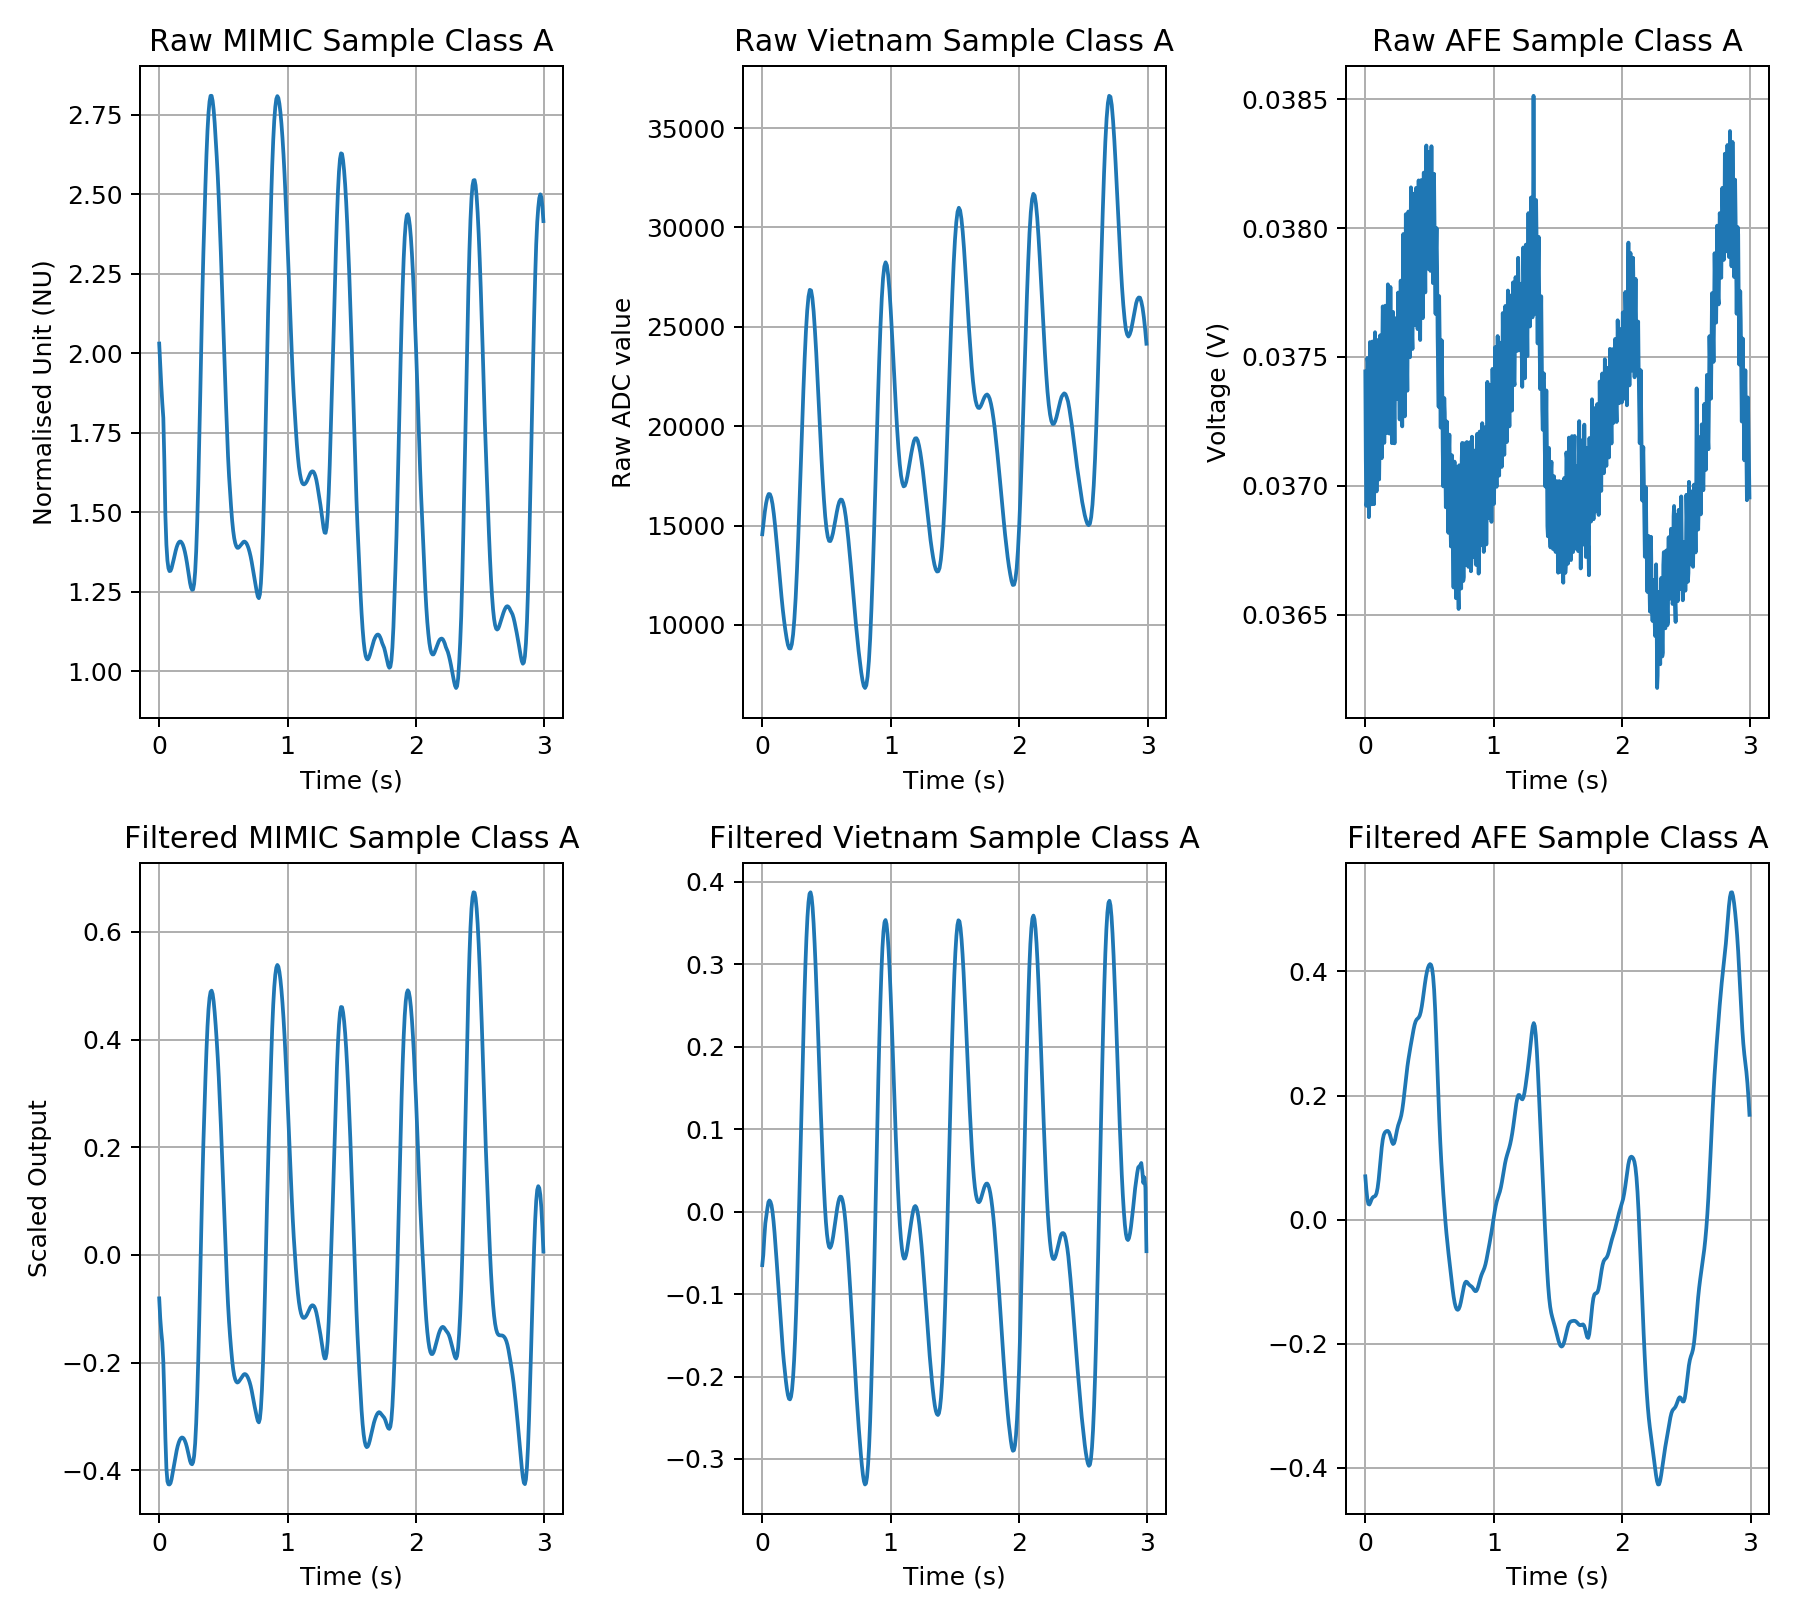

In [24]:
random_MIMIC=random.sample(MIMIC_A_labels,1)
random_Vietnam=random.sample(Vietnam_A_labels,1)
random_AFE=random.sample(AFE_A_labels,1)

print(random_MIMIC)
print(random_Vietnam)
print(random_AFE)


plt.figure(figsize=(10,9))
plt.subplot(2,3,1)
plt.title("Raw MIMIC Sample Class A")
x = np.arange(0.0,3.0,1/125)
plt.plot(x,MIMIC_Raw_Data[random_MIMIC])
plt.grid()
plt.ylabel("Normalised Unit (NU)")
plt.xlabel("Time (s)")

plt.subplot(2,3,2)
plt.title("Raw Vietnam Sample Class A")
x = np.arange(0.0,3.0,1/100)
plt.plot(x,Vietnam_Raw_Data[random_Vietnam])
plt.grid()
plt.ylabel("Raw ADC value")
plt.xlabel("Time (s)")
plt.show()

plt.subplot(2,3,3)
plt.title("Raw AFE Sample Class A")

maskC=AFE_Raw_Data[random_AFE].notna()
data=AFE_Raw_Data[random_AFE][maskC.values]
x=np.arange(0.0,3.0,1/(data.shape[0]/3))

plt.plot(x,data)
plt.grid()
plt.ylabel("Voltage (V)")
plt.xlabel("Time (s)")
plt.show()

plt.subplot(2,3,4)
plt.title("Filtered MIMIC Sample Class A")
x = np.arange(0.0,3.0,1/125)
plt.plot(x,MIMIC_Filtered_Data[random_MIMIC])
plt.grid()
plt.ylabel("Scaled Output")
plt.xlabel("Time (s)")

plt.subplot(2,3,5)
plt.title("Filtered Vietnam Sample Class A")
x = np.arange(0.0,3.0,1/125)
plt.plot(x,Vietnam_Filtered_Data[random_Vietnam])
plt.grid()

plt.xlabel("Time (s)")

plt.subplot(2,3,6)
plt.title("Filtered AFE Sample Class A")
x = np.arange(0.0,3.0,1/125)
plt.plot(x,AFE_Filtered_Data[random_AFE])
plt.grid()
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

# Getting Scores

## Functions for getting scores

In [25]:
from numpy import NaN, Inf, arange, isscalar, asarray, array
def billauer_peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = np.arange(len(v))
    
    v = np.asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in np.arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append(mxpos)
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append(mnpos)
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab) , array(mintab)

In [55]:
def scipy_find_peaks(sig,height=None,threshold=None,distance=None):
    return signal.find_peaks(sig,height=height,threshold=threshold,distance=distance)

In [27]:
def cross_zero(detrended_signal):
    zero_crossings = len(np.where(np.diff(np.sign(detrended_signal)))[0])/len(detrended_signal)
    return zero_crossings

def noise_ratio(filtered_signal):
    return np.var(filtered_signal)/np.var(abs(filtered_signal))

def relative_power(filtered_signal):
    f,PSD = signal.welch(filtered_signal,125,nperseg=len(filtered_signal))
    indices1 = [i for i in range(len(f)) if f[i]>=1.0 and f[i]<=2.4] # indices of PSD's 1 Hz to 2.25 Hz
    indices2 = [i for i in range(len(f)) if f[i]>=0 and f[i]<=8] #indices of PSDS from 0 Hz to 8 Hz
    return (PSD[indices1].sum()/PSD[indices2].sum())

def get_msq(detrended_signal,d=0.4,h=21):
    peaks_1,_=scipy_find_peaks(detrended_signal,distance=h)
    peaks_2,_=billauer_peakdet(detrended_signal,d)
#     print(peaks_1)
#     print(peaks_2)
    if len(peaks_1)==0:
        return 0.0
    return len(np.intersect1d(peaks_1,peaks_2))/len(peaks_1)

def autocorr(x, t=1):
    return numpy.corrcoef(numpy.array([x[:-t], x[t:]]))

### Pulse Segmentation Technique

<IPython.core.display.Javascript object>


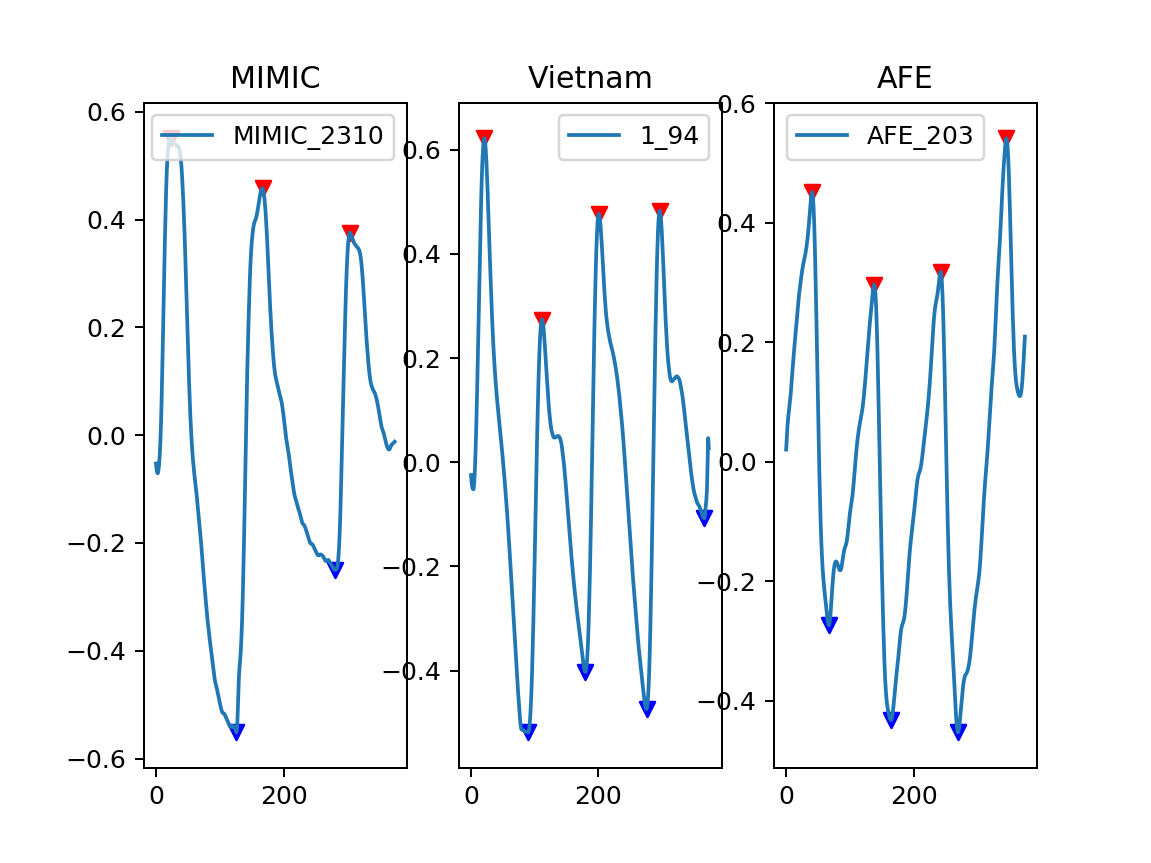

In [28]:
datas = [MIMIC_Detrended_Data,Vietnam_Detrended_Data,AFE_Detrended_Data]
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
axes = [ax1,ax2,ax3]
titles=["MIMIC","Vietnam","AFE"]
for data,ax,title in zip(datas,axes,titles):
    sample= random.sample(list(data.columns),1)
    maxs, mins = billauer_peakdet(data[sample],0.1)
    data[sample].plot(ax=ax)
    if len(maxs)!=0:
        ax.scatter(maxs,data[sample].values[maxs],color="r",marker="v")
    if len(mins)!=0:
        ax.scatter(mins,data[sample].values[mins],color="b",marker="v")
    ax.set_title(title)
plt.show()

In [29]:
def mean_skew(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    
    n_segments = len(mins)-1
    skew_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        skew_scores.append(analysis.skew1(sig))
    return np.mean(skew_scores)

def mean_kurtosis(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    kurtosis_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        kurtosis_scores.append(kurtosis(sig))
    return np.mean(kurtosis_scores)

def mean_entropy(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    entropy_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        entropy_scores.append(entropy(sig))
    return np.mean(entropy_scores)

def mean_snr(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    snr_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        snr_scores.append(noise_ratio(sig))
    return np.mean(snr_scores)

def mean_relative_power(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    relative_powers=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        relative_powers.append(relative_power(sig))
    return np.mean(relative_powers)

In [30]:
def median_skew(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    skew_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        skew_scores.append(analysis.skew1(sig))
    return np.median(skew_scores)

def median_kurtosis(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    kurtosis_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        kurtosis_scores.append(kurtosis(sig))
    return np.median(kurtosis_scores)

def median_entropy(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    entropy_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        entropy_scores.append(entropy(sig))
    return np.median(entropy_scores)

def median_snr(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    snr_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        snr_scores.append(noise_ratio(sig))
    return np.median(snr_scores)

def median_relative_power(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    relative_powers=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        relative_powers.append(relative_power(sig))
    return np.median(relative_powers)

In [31]:
def std_skew(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    skew_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        skew_scores.append(analysis.skew1(sig))
    return np.std(skew_scores)

def std_kurtosis(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    kurtosis_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        kurtosis_scores.append(kurtosis(sig))
    return np.std(kurtosis_scores)

def std_entropy(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    entropy_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        entropy_scores.append(entropy(sig))
    return np.std(entropy_scores)

def std_snr(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    snr_scores=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        snr_scores.append(noise_ratio(sig))
    return np.std(snr_scores)

def std_relative_power(filtered_signal):
    _, mins = billauer_peakdet(filtered_signal,0.1)
    n_segments = len(mins)-1
    relative_powers=[]
    for i in range(n_segments):
        sig = filtered_signal[mins[i]:mins[i+1]]
        relative_powers.append(relative_power(sig))
    return np.std(relative_powers)

In [32]:
def acf(sig):
    return np.array([1]+[np.corrcoef(sig[:-i], sig[i:])[0,1] for i in range(1,len(sig))])


def first_acf_peak_loc(sig):
    corrs=acf(sig)
    peaks=scipy_find_peaks(corrs)
    if len(peaks[0])!=0:
        return peaks[0][0]
    else:
        return 0
    
def first_acf_peak_val(sig):
    corrs=acf(sig)
    peaks=scipy_find_peaks(corrs)
    if len(peaks[0])!=0:
        return corrs[peaks[0][0]]
    else:
        return 0
    
def second_acf_peak_loc(sig):
    corrs=acf(sig)
    peaks=scipy_find_peaks(corrs)
    if len(peaks[0])>=2:
        return peaks[0][1]
    else:
        return 0
def second_acf_peak_val(sig):
    corrs=acf(sig)
    peaks=scipy_find_peaks(corrs)
    if len(peaks[0])>=2:
        return corrs[peaks[0][1]]
    else:
        return 0

# MSQ Optimisation

In [ ]:
AB_train_labels = [index for index in train_labels.index if train_labels["Label"][index]=="A" or train_labels["Label"][index]=="B"]
BC_train_labels = [index for index in train_labels.index if train_labels["Label"][index]=="B" or train_labels["Label"][index]=="C"]

In [35]:
# def get_MSQ(detrended_signal,d,h):
#     peaks_1,_=scipy_find_peaks(detrended_signal,distance=h)
#     peaks_2,_=billauer_peakdet(detrended_signal,d)
# #     print(peaks_1)
# #     print(peaks_2)
#     if len(peaks_1)==0:
#         return 0.0
#     return len(np.intersect1d(peaks_1,peaks_2))/len(peaks_1)
def get_MSQs(Data,d,h):
    msqs=[]
    for col in Data:
        msqs.append(get_msq(Data[col],d,h))
    MSQS=pd.DataFrame(msqs,columns=[["MSQ"]],index=Data.columns)
    return MSQS


In [36]:
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

In [37]:
deltas=np.arange(0.01,0.81,0.10)
heights=np.arange(1,275,10)
All_labels=pd.concat([MIMIC_labels,Vietnam_labels,AFE_labels])
AB_labels= [index for index in All_labels.index if All_labels["Label"][index]=="A" or All_labels["Label"][index]=="B"]
C_labels= [index for index in All_labels.index if All_labels["Label"][index]=="C"]
BC_labels= [index for index in All_labels.index if All_labels["Label"][index]=="B" or All_labels["Label"][index]=="C"]
A_labels= [index for index in All_labels.index if All_labels["Label"][index]=="A"]

res1s=[]
res2s=[]
for d in tqdm(deltas):
    r1s=[]
    r2s=[]
    for h in tqdm(heights):
        MIMIC_MSQs=get_MSQs(MIMIC_Detrended_Data,d,h)
        Vietnam_MSQs=get_MSQs(Vietnam_Detrended_Data,d,h)
        AFE_MSQs=get_MSQs(AFE_Detrended_Data,d,h)
        All_MSQs=pd.concat([MIMIC_MSQs,Vietnam_MSQs,AFE_MSQs])
#         print(All_MSQs.loc[AB_labels].values)
#         print(All_MSQs.loc[C_labels].values)
        res1=mannwhitneyu(All_MSQs.loc[AB_labels].values,All_MSQs.loc[C_labels].values,alternative="two-sided")[1]
        res2=mannwhitneyu(All_MSQs.loc[BC_labels].values,All_MSQs.loc[A_labels].values,alternative="two-sided")[1]
        print("d:{} h:{} res:{}".format(d,h,res1))
        print("d:{} h:{} res:{}".format(d,h,res2))
        r1s.append(res1)
        r2s.append(res2)
        print("")
    res1s.append(r1s)
    res2s.append(r2s)

d:0.01 h:1 res:2.6914554832005324e-20
d:0.01 h:1 res:7.386257067875748e-05

d:0.01 h:11 res:2.181619157210035e-21
d:0.01 h:11 res:7.366138802347239e-05

d:0.01 h:21 res:2.03419817922884e-08
d:0.01 h:21 res:4.9088705512338405e-06

d:0.01 h:31 res:7.243855575238731e-09
d:0.01 h:31 res:1.563421406448254e-13

d:0.01 h:41 res:5.0975170531003537e-17
d:0.01 h:41 res:5.480924148112048e-17

d:0.01 h:51 res:7.975634886838829e-28
d:0.01 h:51 res:7.141396218184736e-06

d:0.01 h:61 res:2.395847916061753e-36
d:0.01 h:61 res:0.0020724619488539345

d:0.01 h:71 res:1.9015158220783875e-34
d:0.01 h:71 res:0.08846256605505295

d:0.01 h:81 res:1.431894874759427e-25
d:0.01 h:81 res:0.08264732712251491

d:0.01 h:91 res:4.758952350488287e-06
d:0.01 h:91 res:0.013037371036700857

d:0.01 h:101 res:0.07051680052500553
d:0.01 h:101 res:0.003927755806402264

d:0.01 h:111 res:0.23632703125173515
d:0.01 h:111 res:0.011282555235838378

d:0.01 h:121 res:1.5167071576588248e-06
d:0.01 h:121 res:0.000129863030118297

d:0

d:0.11 h:1 res:3.3039354918281206e-102
d:0.11 h:1 res:3.8682952018568213e-16

d:0.11 h:11 res:1.6672173241477822e-105
d:0.11 h:11 res:2.2722656233084313e-22

d:0.11 h:21 res:2.3975285621507284e-92
d:0.11 h:21 res:4.0438479258152133e-29

d:0.11 h:31 res:2.049950346731783e-79
d:0.11 h:31 res:6.174298524581188e-11

d:0.11 h:41 res:1.299681106205831e-88
d:0.11 h:41 res:0.009425852817633975

d:0.11 h:51 res:1.1985021165401471e-94
d:0.11 h:51 res:0.0006769637153077684

d:0.11 h:61 res:6.051421494348359e-113
d:0.11 h:61 res:0.0001938760942514874

d:0.11 h:71 res:6.8252281481608146e-99
d:0.11 h:71 res:0.03174195341704387

d:0.11 h:81 res:8.977887326033232e-81
d:0.11 h:81 res:4.6090454055485625e-08

d:0.11 h:91 res:2.1588991264382256e-36
d:0.11 h:91 res:0.008853589648125083

d:0.11 h:101 res:7.63288769842154e-23
d:0.11 h:101 res:0.8224762762120091

d:0.11 h:111 res:1.2148898603175692e-36
d:0.11 h:111 res:0.057434215269976135

d:0.11 h:121 res:2.2097873609783668e-58
d:0.11 h:121 res:0.0022726893

d:0.21000000000000002 h:1 res:3.906389014656993e-133
d:0.21000000000000002 h:1 res:2.7464633774773746e-40

d:0.21000000000000002 h:11 res:8.389259126068314e-139
d:0.21000000000000002 h:11 res:1.093263588047177e-50

d:0.21000000000000002 h:21 res:5.312284947828802e-131
d:0.21000000000000002 h:21 res:6.009677621542932e-65

d:0.21000000000000002 h:31 res:7.932841130745162e-120
d:0.21000000000000002 h:31 res:1.9740019526441563e-42

d:0.21000000000000002 h:41 res:1.9929902810536276e-128
d:0.21000000000000002 h:41 res:0.7079537457775935

d:0.21000000000000002 h:51 res:1.9398295712710127e-141
d:0.21000000000000002 h:51 res:3.851269127546361e-06

d:0.21000000000000002 h:61 res:1.2290736518605993e-152
d:0.21000000000000002 h:61 res:2.617760160916352e-07

d:0.21000000000000002 h:71 res:1.1373440247711697e-145
d:0.21000000000000002 h:71 res:0.44084892171339074

d:0.21000000000000002 h:81 res:8.20680318946192e-126
d:0.21000000000000002 h:81 res:0.008901384984257021

d:0.21000000000000002 h:91 res:

d:0.31000000000000005 h:1 res:3.4829161578275736e-159
d:0.31000000000000005 h:1 res:6.146792507462033e-36

d:0.31000000000000005 h:11 res:8.377329234383966e-165
d:0.31000000000000005 h:11 res:2.6780726202150104e-45

d:0.31000000000000005 h:21 res:3.4800412820217058e-162
d:0.31000000000000005 h:21 res:4.630861746044436e-57

d:0.31000000000000005 h:31 res:1.684176670182464e-152
d:0.31000000000000005 h:31 res:9.442353690491343e-35

d:0.31000000000000005 h:41 res:2.309203831241891e-164
d:0.31000000000000005 h:41 res:0.3772528704947513

d:0.31000000000000005 h:51 res:5.017883563433744e-181
d:0.31000000000000005 h:51 res:2.4051530581010206e-11

d:0.31000000000000005 h:61 res:7.523881544612852e-189
d:0.31000000000000005 h:61 res:1.9654157464931378e-16

d:0.31000000000000005 h:71 res:6.961189944295056e-183
d:0.31000000000000005 h:71 res:1.250778714565957e-05

d:0.31000000000000005 h:81 res:5.8595241241257445e-167
d:0.31000000000000005 h:81 res:0.19498884132176753

d:0.31000000000000005 h:91 re

d:0.41000000000000003 h:1 res:5.543631704776886e-193
d:0.41000000000000003 h:1 res:3.0424266478663672e-24

d:0.41000000000000003 h:11 res:2.408549824647199e-199
d:0.41000000000000003 h:11 res:2.6413692511711813e-31

d:0.41000000000000003 h:21 res:6.499886847078285e-200
d:0.41000000000000003 h:21 res:2.2767902926915237e-39

d:0.41000000000000003 h:31 res:1.0158148085445749e-190
d:0.41000000000000003 h:31 res:2.2563652106605554e-20

d:0.41000000000000003 h:41 res:2.3434621379006307e-202
d:0.41000000000000003 h:41 res:0.000184608065410707

d:0.41000000000000003 h:51 res:3.518140814333763e-218
d:0.41000000000000003 h:51 res:4.743879686192668e-22

d:0.41000000000000003 h:61 res:1.4339470422939234e-217
d:0.41000000000000003 h:61 res:2.9340541776987404e-29

d:0.41000000000000003 h:71 res:6.466628266155814e-210
d:0.41000000000000003 h:71 res:1.5147297081141967e-13

d:0.41000000000000003 h:81 res:1.9115272628870315e-188
d:0.41000000000000003 h:81 res:4.17596592696824e-06

d:0.41000000000000003 

d:0.51 h:1 res:1.1733821312236685e-217
d:0.51 h:1 res:2.6833320007736447e-13

d:0.51 h:11 res:9.080700477804735e-225
d:0.51 h:11 res:6.755081446104588e-18

d:0.51 h:21 res:1.5744043566816582e-226
d:0.51 h:21 res:7.404628163352631e-23

d:0.51 h:31 res:1.5126418971374094e-219
d:0.51 h:31 res:6.860032586855358e-11

d:0.51 h:41 res:6.3980571733244024e-232
d:0.51 h:41 res:1.303474004166017e-09

d:0.51 h:51 res:3.578079822919912e-241
d:0.51 h:51 res:8.339671580877236e-33

d:0.51 h:61 res:1.611667893580037e-232
d:0.51 h:61 res:2.3029560043888082e-39

d:0.51 h:71 res:1.6191439841521492e-209
d:0.51 h:71 res:2.649236325978975e-20

d:0.51 h:81 res:8.135494395626168e-187
d:0.51 h:81 res:1.460325037314887e-09

d:0.51 h:91 res:8.195961679372622e-153
d:0.51 h:91 res:0.0048835374838868476

d:0.51 h:101 res:2.7495096401654585e-148
d:0.51 h:101 res:0.007832420001534444

d:0.51 h:111 res:1.464051360380069e-143
d:0.51 h:111 res:0.002180363225507836

d:0.51 h:121 res:4.8327027148592164e-152
d:0.51 h:121 re

d:0.6100000000000001 h:1 res:5.918561086359417e-225
d:0.6100000000000001 h:1 res:3.996244079362345e-06

d:0.6100000000000001 h:11 res:1.242589505202721e-229
d:0.6100000000000001 h:11 res:7.868646725217518e-09

d:0.6100000000000001 h:21 res:6.4715081908092986e-229
d:0.6100000000000001 h:21 res:1.4571497820266652e-11

d:0.6100000000000001 h:31 res:3.6955293368867185e-225
d:0.6100000000000001 h:31 res:3.1219472860139805e-05

d:0.6100000000000001 h:41 res:2.9926458884238855e-232
d:0.6100000000000001 h:41 res:5.339882853571259e-11

d:0.6100000000000001 h:51 res:4.4163181124120627e-237
d:0.6100000000000001 h:51 res:1.1117446999299113e-29

d:0.6100000000000001 h:61 res:4.2780761596505144e-226
d:0.6100000000000001 h:61 res:2.9059017444670915e-37

d:0.6100000000000001 h:71 res:2.361066018765082e-208
d:0.6100000000000001 h:71 res:2.9271193817055803e-22

d:0.6100000000000001 h:81 res:1.4538468367946293e-191
d:0.6100000000000001 h:81 res:9.335771884798954e-12

d:0.6100000000000001 h:91 res:2.17788

d:0.7100000000000001 h:1 res:2.902761721548504e-220
d:0.7100000000000001 h:1 res:0.036942029122411305

d:0.7100000000000001 h:11 res:2.5699251447562055e-222
d:0.7100000000000001 h:11 res:0.0025812991402427306

d:0.7100000000000001 h:21 res:5.2631185064227164e-219
d:0.7100000000000001 h:21 res:0.00026834757856034546

d:0.7100000000000001 h:31 res:2.2245975528408827e-212
d:0.7100000000000001 h:31 res:0.06342003793296551

d:0.7100000000000001 h:41 res:1.1650142118400724e-215
d:0.7100000000000001 h:41 res:2.2556201454553437e-08

d:0.7100000000000001 h:51 res:4.267825926061392e-217
d:0.7100000000000001 h:51 res:1.513438706445444e-18

d:0.7100000000000001 h:61 res:1.8320450404125173e-206
d:0.7100000000000001 h:61 res:1.2518099311222982e-25

d:0.7100000000000001 h:71 res:1.1717560079054313e-193
d:0.7100000000000001 h:71 res:1.5884860914389943e-21

d:0.7100000000000001 h:81 res:4.5608360405287656e-188
d:0.7100000000000001 h:81 res:8.712834656390054e-12

d:0.7100000000000001 h:91 res:2.85012432

In [38]:
AB_ManWhitney=pd.DataFrame(res1s,columns=heights,index=deltas)
BC_ManWhitney=pd.DataFrame(res2s,columns=heights,index=deltas)
AB_ManWhitney=AB_ManWhitney.apply(np.log)
BC_ManWhitney=BC_ManWhitney.apply(np.log)

In [40]:
import seaborn as sns

In [39]:
string_deltas=[]
for d in deltas:
    string_deltas.append("{0:1.2f}".format(d))
string_deltas

['0.01', '0.11', '0.21', '0.31', '0.41', '0.51', '0.61', '0.71']

<IPython.core.display.Javascript object>


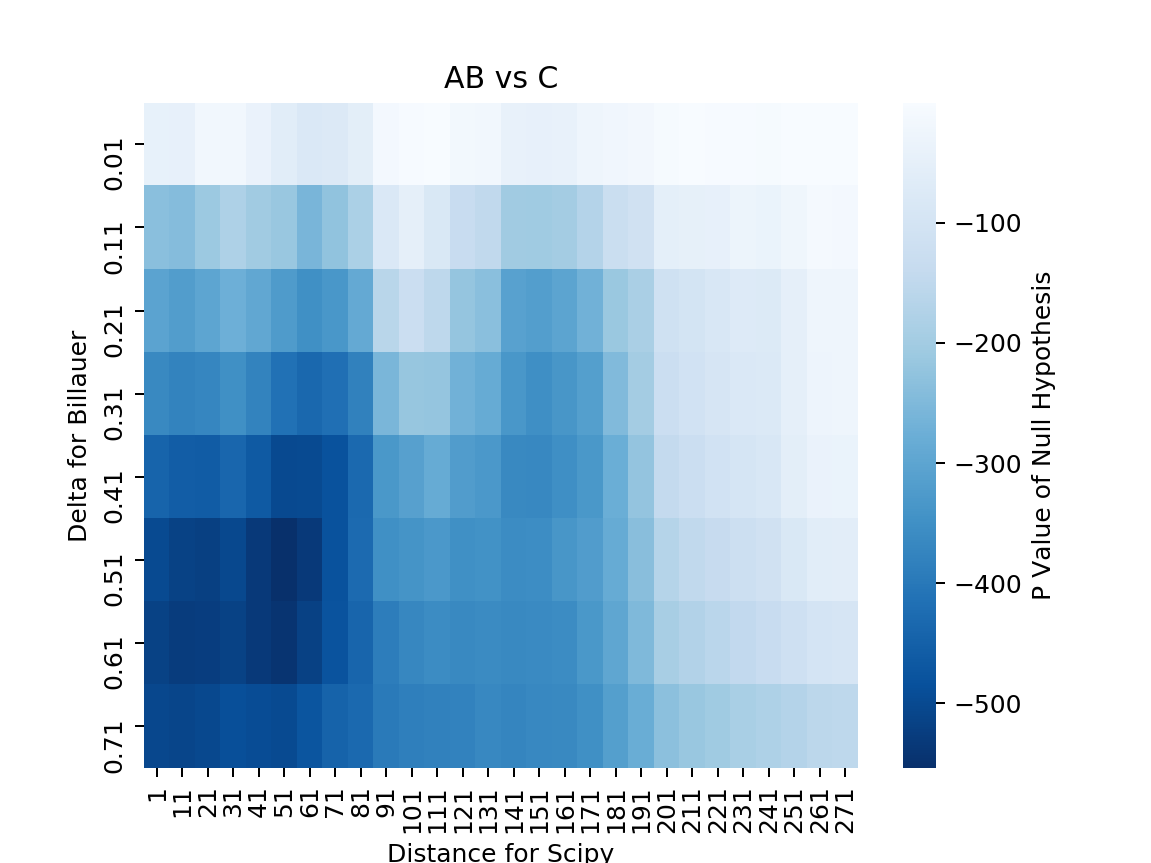

In [41]:
plt.figure()
plt.title("AB vs C")
sns.heatmap(AB_ManWhitney,yticklabels=string_deltas,cmap=plt.cm.Blues_r, xticklabels=heights,cbar_kws={"label":"P Value of Null Hypothesis"})
plt.xlabel("Distance for Scipy")
plt.ylabel("Delta for Billauer")
plt.show()

<IPython.core.display.Javascript object>


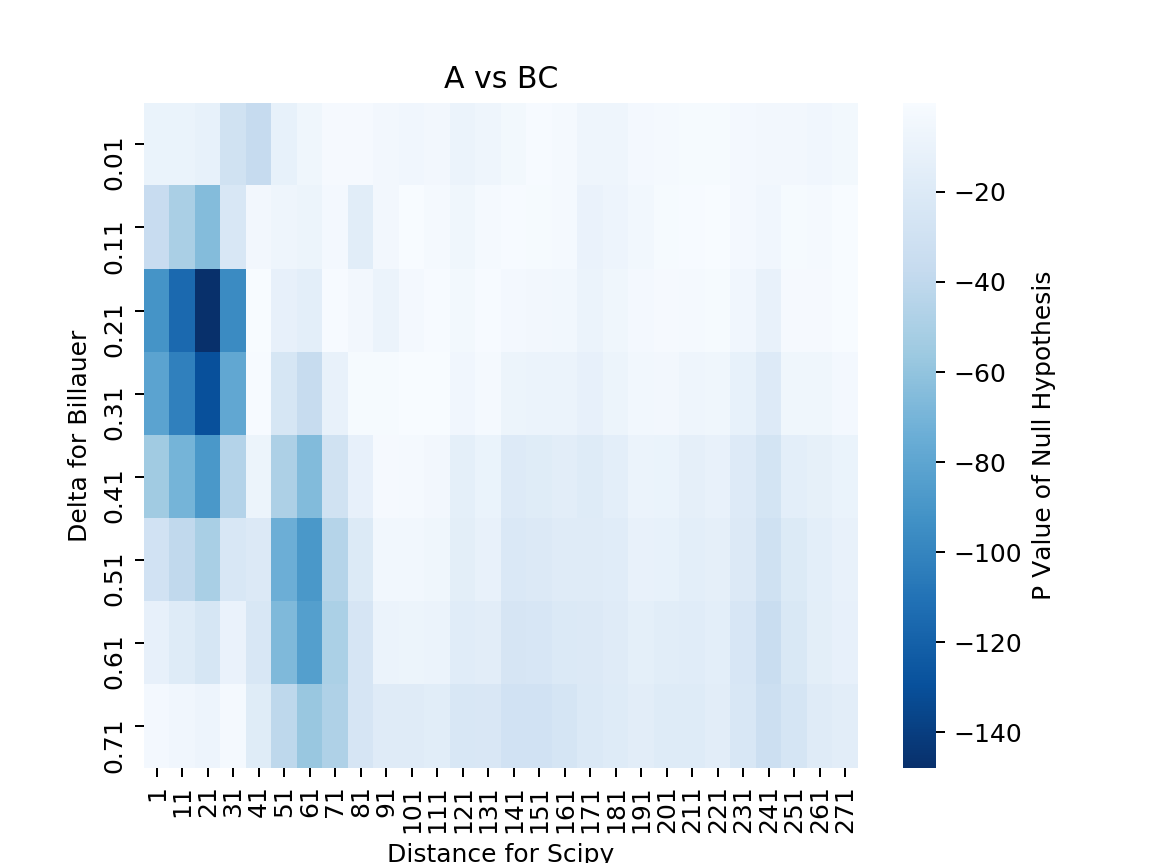

In [42]:
plt.figure()
plt.title("A vs BC")
sns.heatmap(BC_ManWhitney,yticklabels=string_deltas, xticklabels=heights,cmap=plt.cm.Blues_r,cbar_kws={"label":"P Value of Null Hypothesis"})

plt.xlabel("Distance for Scipy")
plt.ylabel("Delta for Billauer")
plt.show()

<IPython.core.display.Javascript object>


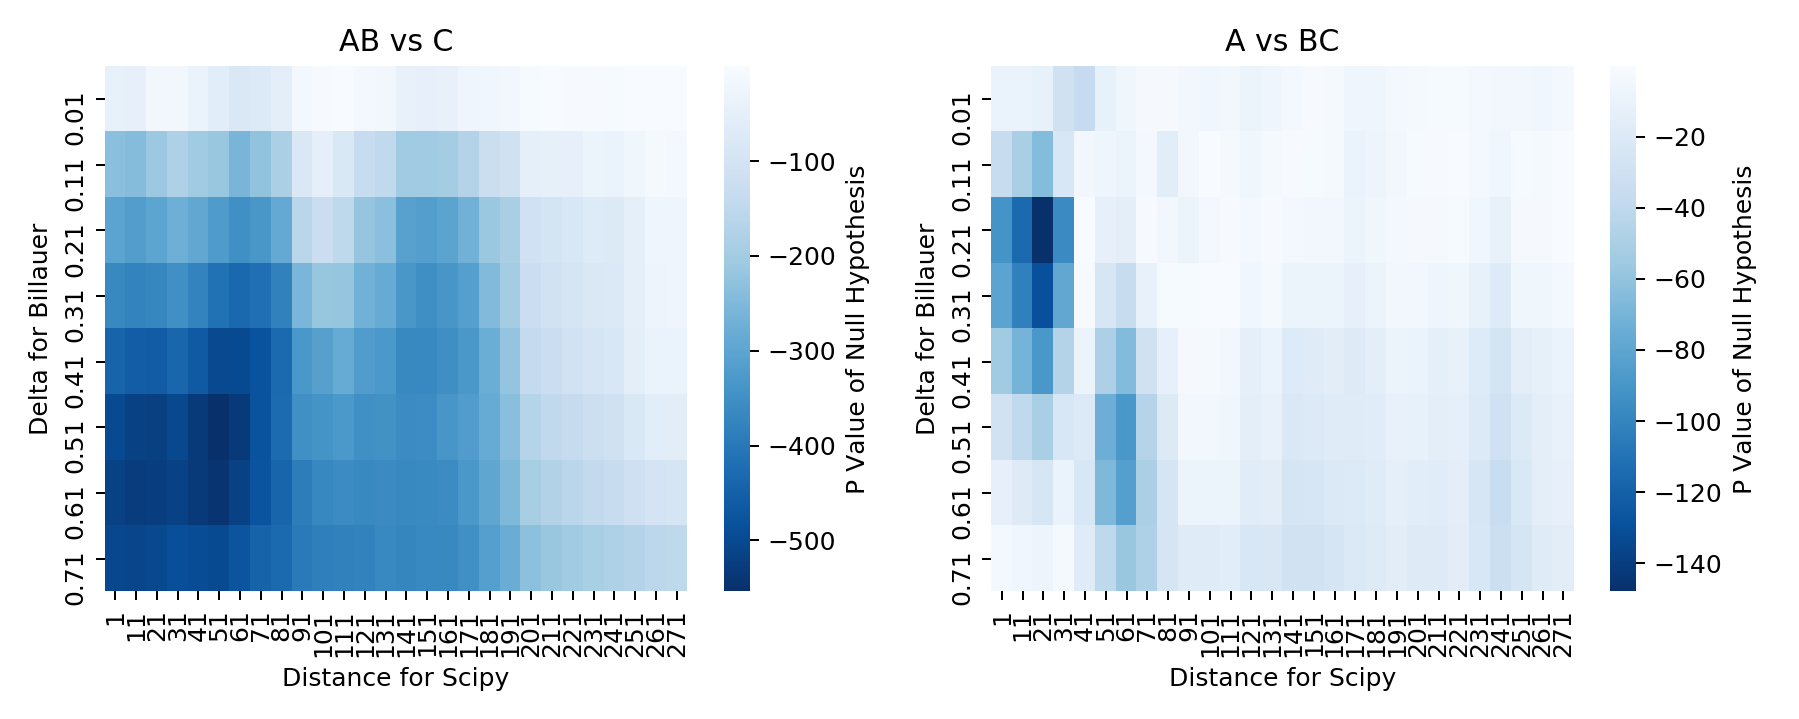

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("AB vs C")
sns.heatmap(AB_ManWhitney,yticklabels=string_deltas, xticklabels=heights,cmap=plt.cm.Blues_r,cbar_kws={"label":"P Value of Null Hypothesis"})
plt.xlabel("Distance for Scipy")
plt.ylabel("Delta for Billauer")
plt.subplot(1,2,2)
plt.title("A vs BC")
sns.heatmap(BC_ManWhitney,yticklabels=string_deltas, xticklabels=heights,cmap=plt.cm.Blues_r,cbar_kws={"label":"P Value of Null Hypothesis"})
plt.xlabel("Distance for Scipy")
plt.ylabel("Delta for Billauer")
plt.tight_layout()

## ACF Example

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


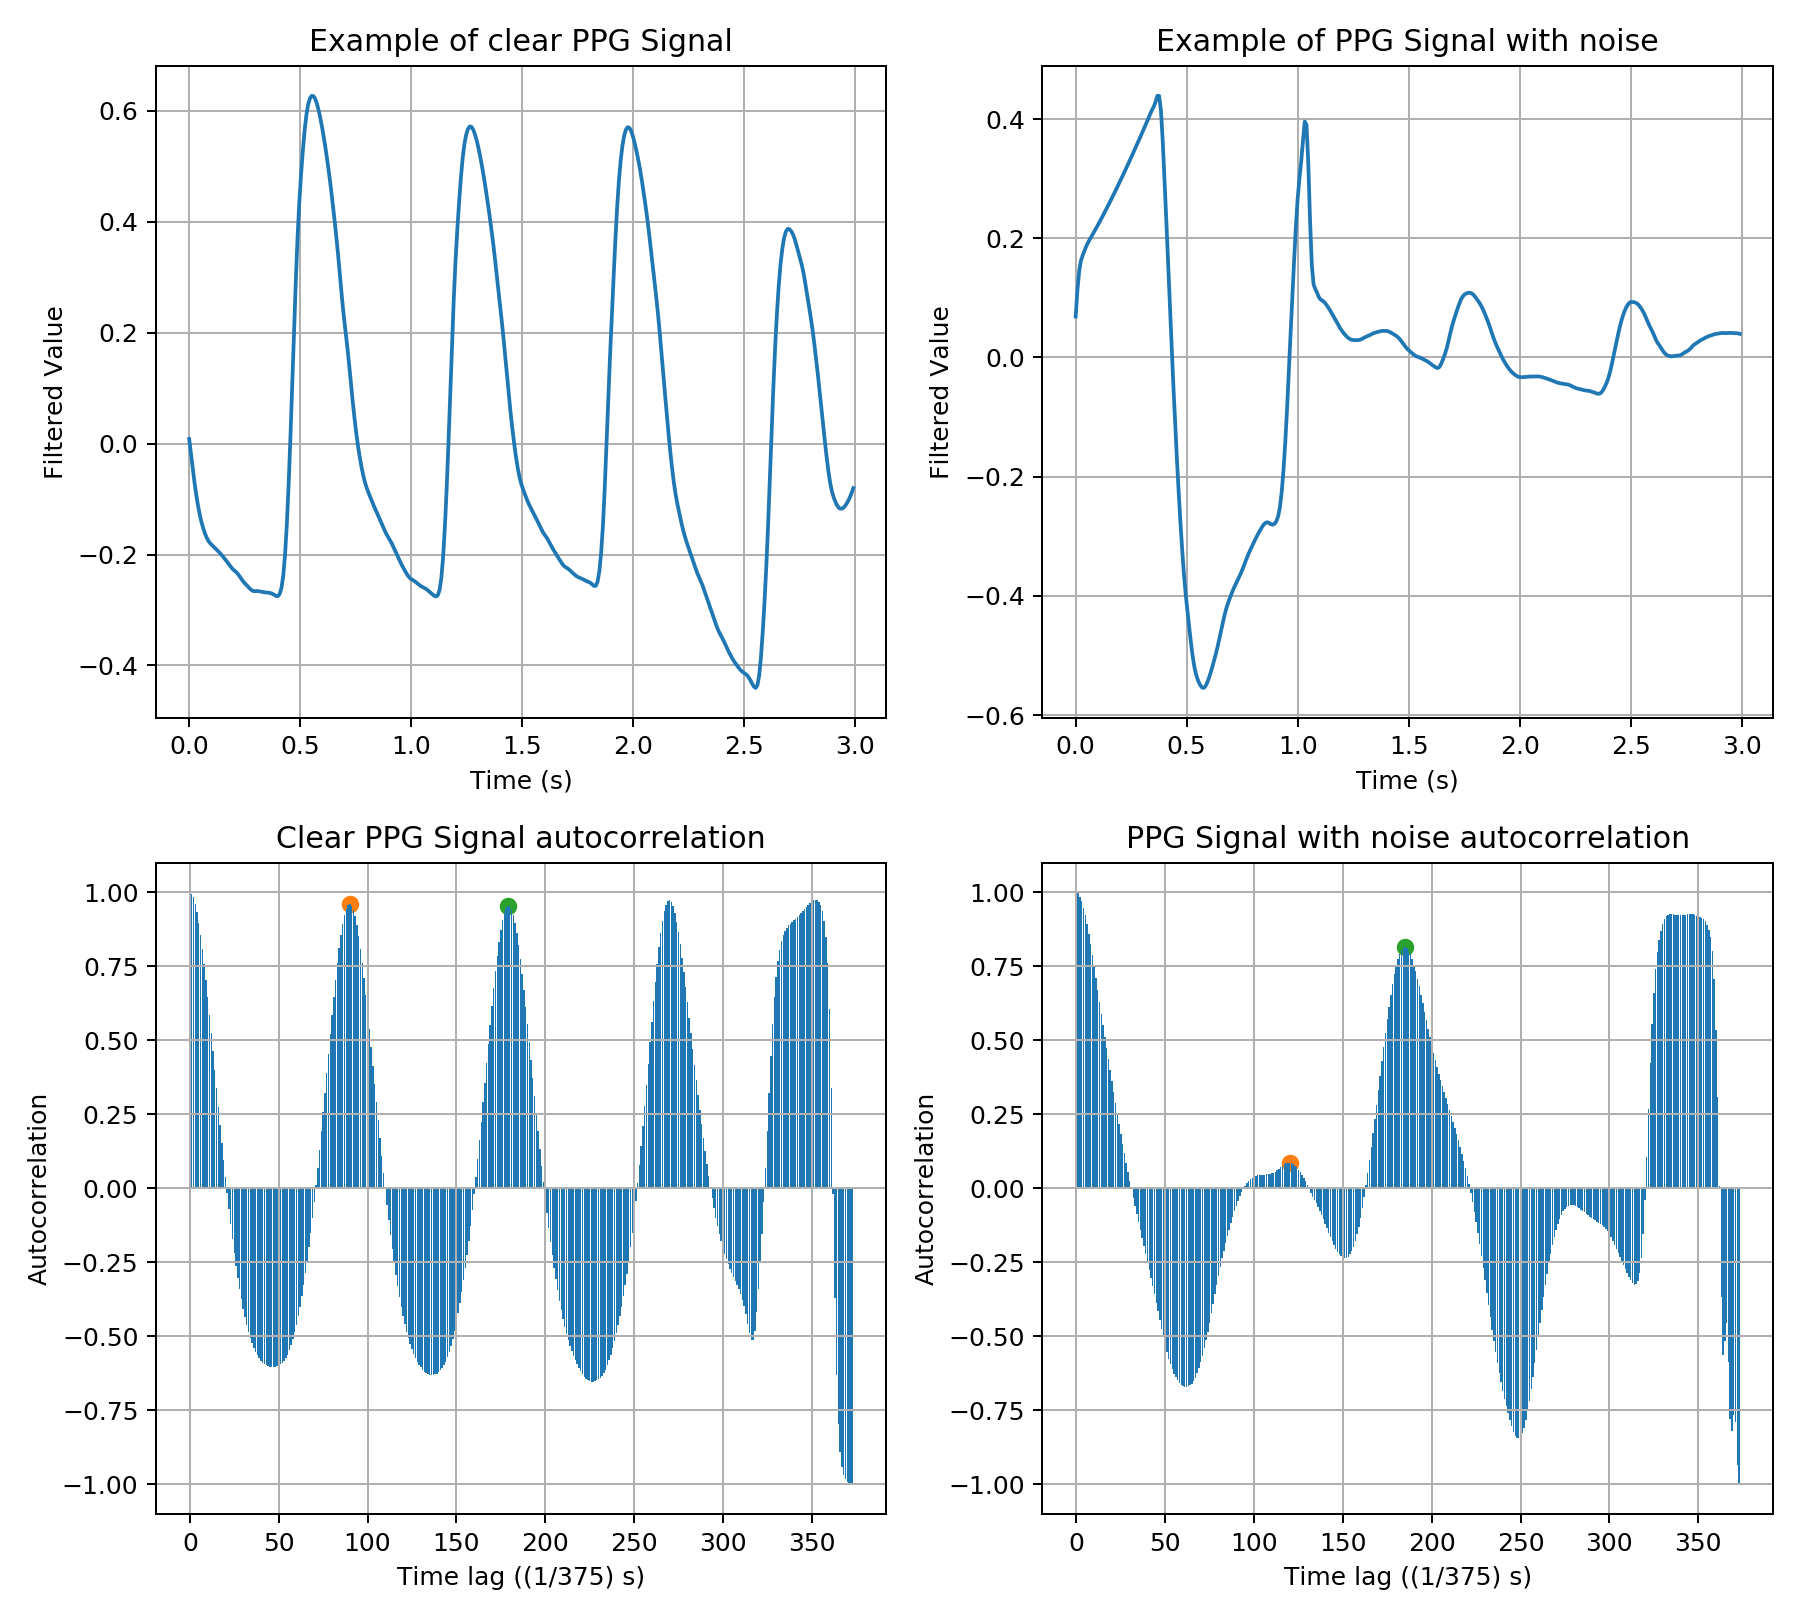

In [451]:
plt.figure(figsize=(10,9))
# A_sample= random.sample(list(MIMIC_B_labels),1)
# C_sample= random.sample(list(MIMIC_C_labels),1)
plt.subplot(2,2,1)
x=np.arange(0,3,1/125)
plt.plot(x,MIMIC_Detrended_Data[A_sample[0]].values)
plt.title("Example of clear PPG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Filtered Value")
plt.grid()
plt.subplot(2,2,2)
plt.plot(x,MIMIC_Detrended_Data[C_sample[0]].values)
plt.show()
plt.title("Example of PPG Signal with noise")
plt.xlabel("Time (s)")
plt.ylabel("Filtered Value")
plt.grid()
plt.subplot(2,2,3)

corr=acf(MIMIC_Detrended_Data[A_sample[0]].values)
x=range(corr.shape[0])
loc_peak1=first_acf_peak_loc(MIMIC_Detrended_Data[A_sample[0]])
val_peak1=first_acf_peak_val(MIMIC_Detrended_Data[A_sample[0]])
loc_peak2=second_acf_peak_loc(MIMIC_Detrended_Data[A_sample[0]])
val_peak2=second_acf_peak_val(MIMIC_Detrended_Data[A_sample[0]])

plt.bar(x,corr)
plt.scatter(loc_peak1,val_peak1)
plt.scatter(loc_peak2,val_peak2)
plt.title("Clear PPG Signal autocorrelation")
plt.xlabel("Time lag ((1/375) s)")
plt.ylabel("Autocorrelation")
plt.grid()
# plt.xticks(np.arange(0,3,1/125))


plt.subplot(2,2,4)

corr=acf(MIMIC_Detrended_Data[C_sample[0]].values)
x=range(corr.shape[0])
loc_peak1=first_acf_peak_loc(MIMIC_Detrended_Data[C_sample[0]])
val_peak1=first_acf_peak_val(MIMIC_Detrended_Data[C_sample[0]])
loc_peak2=second_acf_peak_loc(MIMIC_Detrended_Data[C_sample[0]])
val_peak2=second_acf_peak_val(MIMIC_Detrended_Data[C_sample[0]])

plt.bar(x,corr)
plt.scatter(loc_peak1,val_peak1)
plt.scatter(loc_peak2,val_peak2)
plt.title("PPG Signal with noise autocorrelation")
plt.xlabel("Time lag ((1/375) s)")
plt.ylabel("Autocorrelation")
# plt.xticks(np.arange(0,3,1/125))
plt.grid()
plt.tight_layout()
plt.show()

##  Collating all Scores

In [45]:
def get_scores(labels,Filtered_Data,Detrended_Data,delta=0.4,height=21):
    skewnesses=[]
    kurtosises=[]
    entropies=[]
    zeros=[]
    msq=[]
    snrs=[]
    relative_powers=[]
    for index in labels:
        skewnesses.append(analysis.skew1(Filtered_Data[index].values))
        kurtosises.append(kurtosis(Filtered_Data[index].values))
        entropies.append(entropy(Filtered_Data[index].values))
        zeros.append(cross_zero(Detrended_Data[index].values))
        msq.append(get_msq(Detrended_Data[index].values,d=delta,h=height))
        snrs.append(noise_ratio(Detrended_Data[index].values))
        relative_powers.append(relative_power(Detrended_Data[index].values))
    Skewnesses = pd.Series(skewnesses,index=labels,name="Skewness")
    Kurtosises = pd.Series(kurtosises,index=labels,name="Kurtosis")
    Entropies = pd.Series(entropies,index=labels,name="Entropy")
    Zeros = pd.Series(zeros,index=labels,name="Zeros")
    MSQ = pd.Series(msq,index=labels,name="MSQ")
    SNR = pd.Series(snrs,index=labels,name="SNR")
    Relative_Power = pd.Series(relative_powers,index=labels,name="Relative Power")
    return pd.concat([Skewnesses,Kurtosises,Entropies,Zeros,MSQ,SNR,Relative_Power],axis=1)

In [46]:
def new_get_scores(functions,titles,labels,Filtered_Data,Detrended_Data):
    Scores=[]
    labels_len=len(labels)
    with tqdm(total=len(functions)*labels_len) as pbar:
        for function,title in zip(functions,titles):
            print(title)
            if(title=="Entropy" or title=="mean_Entropy" or title=="median_Entropy" or title=="std_Entropy"):
                print("in special")
                tmp=[]
                for index in labels:
                    tmp.append(function(Filtered_Data[index].values))
                    pbar.update(1)
                Scores.append(pd.Series(tmp,index=labels,name=title))
            else:
                tmp=[]
                for index in labels:
                    tmp.append(function(Detrended_Data[index].values))
                    pbar.update(1)
                Scores.append(pd.Series(tmp,index=labels,name=title))
    return pd.concat(Scores,axis=1)    

In [47]:
full_functions=[analysis.skew1,kurtosis,entropy,cross_zero,get_msq,noise_ratio,relative_power]
mean_functions=[mean_skew,mean_kurtosis,mean_entropy,mean_snr,mean_relative_power]
median_functions=[median_skew,median_kurtosis,median_entropy,median_snr,median_relative_power]
std_functions=[std_skew,std_kurtosis,std_entropy,std_snr,std_relative_power]
corr_functions=[first_acf_peak_loc,first_acf_peak_val,second_acf_peak_loc,second_acf_peak_val]

full_titles=["Skewness","Kurtosis","Entropy","Zeros","MSQ","SNR","Relative_Power"]
mean_titles=["mean_{}".format(title) for title in full_titles if title!="MSQ" and title!="Zeros"]
median_titles=["median_{}".format(title) for title in full_titles if title!="MSQ" and title!="Zeros"]
std_titles=["std_{}".format(title) for title in full_titles if title!="MSQ" and title!="Zeros"]
corr_titles=["AC_loc1","AC_peak1","AC_loc2","AC_peak2"]

All_titles=[]
All_titles.extend(full_titles)
All_titles.extend(mean_titles)
All_titles.extend(median_titles)
All_titles.extend(std_titles)
All_titles.extend(corr_titles)

All_functions=[]
All_functions.extend(full_functions)
All_functions.extend(mean_functions)
All_functions.extend(median_functions)
All_functions.extend(std_functions)
All_functions.extend(corr_functions)


# All_functions=[full_functions, mean_functions, median_functions, std_functions, corr_functions]
# All_titles=[full_titles,mean_titles,median_titles,std_titles,corr_titles]
# new_get_scores(functions,titles,MIMIC_labels.index,MIMIC_Filtered_Data,MIMIC_Detrended_Data,height=0.5)

In [55]:
SQIs=np.arange(1,len(All_titles)+1)

In [48]:
MIMIC_Scores = new_get_scores(All_functions,All_titles,MIMIC_labels.index,MIMIC_Filtered_Data,MIMIC_Detrended_Data)

Skewness
Kurtosis
Entropy
in special
Zeros
MSQ
SNR
Relative_Power
mean_Skewness


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


mean_Kurtosis
mean_Entropy
in special
mean_SNR
mean_Relative_Power
median_Skewness
median_Kurtosis
median_Entropy
in special
median_SNR
median_Relative_Power
std_Skewness


/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


std_Kurtosis
std_Entropy
in special
std_SNR
std_Relative_Power
AC_loc1


/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)


AC_peak1
AC_loc2
AC_peak2



In [50]:
Vietnam_Scores = new_get_scores(All_functions,All_titles,Vietnam_labels.index,Vietnam_Filtered_Data,Vietnam_Detrended_Data)

Skewness
Kurtosis
Entropy
in special
Zeros
MSQ
SNR
Relative_Power
mean_Skewness
mean_Kurtosis
mean_Entropy
in special
mean_SNR
mean_Relative_Power
median_Skewness
median_Kurtosis
median_Entropy
in special
median_SNR
median_Relative_Power
std_Skewness
std_Kurtosis
std_Entropy
in special
std_SNR
std_Relative_Power
AC_loc1
AC_peak1
AC_loc2
AC_peak2



In [51]:
AFE_Scores = new_get_scores(All_functions,All_titles,AFE_labels.index,AFE_Filtered_Data,AFE_Detrended_Data)

Skewness
Kurtosis
Entropy
in special
Zeros
MSQ
SNR
Relative_Power
mean_Skewness
mean_Kurtosis
mean_Entropy
in special
mean_SNR
mean_Relative_Power
median_Skewness
median_Kurtosis
median_Entropy
in special
median_SNR
median_Relative_Power
std_Skewness
std_Kurtosis
std_Entropy
in special
std_SNR
std_Relative_Power
AC_loc1
AC_peak1
AC_loc2
AC_peak2



In [52]:
MIMIC_indices = ["MIMIC_{}".format(i) for i in range(MIMIC_Scores.shape[0])]
Vietnam_indices =["Vietnam_{}".format(i) for i in range(Vietnam_Scores.shape[0])]

MIMIC_Scores.index=MIMIC_indices
MIMIC_labels.index=MIMIC_indices
Vietnam_Scores.index=Vietnam_indices
Vietnam_labels.index=Vietnam_indices

MIMIC_Detrended_Data.columns=MIMIC_indices
Vietnam_Detrended_Data.columns=Vietnam_indices
MIMIC_Filtered_Data.columns=MIMIC_indices
Vietnam_Filtered_Data.columns=Vietnam_indices

In [53]:
MIMIC_Scores

,Skewness,Kurtosis,Entropy,Zeros,MSQ,SNR,Relative_Power,mean_Skewness,mean_Kurtosis,mean_Entropy,...,median_Relative_Power,std_Skewness,std_Kurtosis,std_Entropy,std_SNR,std_Relative_Power,AC_loc1,AC_peak1,AC_loc2,AC_peak2
MIMIC_0,0.620554,-0.707384,-inf,0.026667,0.400000,3.362610,0.692298,0.817649,-0.671830,-inf,...,0.759354,0.126354,0.251710,NaN,0.915316,0.039133,81,0.825728,162,0.834088
MIMIC_1,0.632253,-0.537709,-inf,0.021333,0.444444,2.959735,0.679159,0.580461,-0.574587,-inf,...,0.432917,0.211444,0.615296,NaN,0.866247,0.239710,82,0.364689,164,0.747756
MIMIC_2,0.578084,-0.792735,-inf,0.026667,0.555556,3.328825,0.739999,0.646871,-0.864642,-inf,...,0.744322,0.115299,0.163513,NaN,0.416942,0.082147,83,0.882126,164,0.834463
MIMIC_3,0.578295,-0.772815,-inf,0.026667,0.500000,3.296166,0.742830,0.646157,-0.855278,-inf,...,0.756934,0.162448,0.157553,NaN,0.321008,0.054472,83,0.869710,165,0.869664
MIMIC_4,0.999082,-0.251337,-inf,0.021333,0.444444,3.201943,0.755156,0.706701,-0.895500,-inf,...,0.791584,0.166368,0.246765,NaN,0.605989,0.059498,83,0.944786,166,0.947559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIMIC_2645,0.579304,-0.521319,-inf,0.021333,1.000000,3.288065,0.762152,0.277023,-1.080117,-inf,...,0.679043,0.216615,0.195380,NaN,0.756784,0.294229,124,0.380885,213,0.709526
MIMIC_2646,0.125857,-1.269548,-inf,0.026667,0.666667,4.076396,0.849195,0.031917,-1.118553,-inf,...,0.696786,0.328632,0.197786,NaN,0.803429,0.076282,80,0.479999,165,0.211046
MIMIC_2647,0.108348,-0.279778,-inf,0.024000,0.250000,2.535732,0.650057,-0.424617,-0.172335,-inf,...,0.567273,0.710747,1.138716,NaN,0.519082,0.141650,66,-0.028548,151,0.231890
MIMIC_2648,0.516444,-1.003795,-inf,0.021333,1.000000,3.884976,0.841193,0.358051,-1.186640,-inf,...,0.679924,0.108780,0.262706,NaN,0.609741,0.063552,86,0.826023,176,0.947761


In [54]:
MIMIC_Scores.to_pickle("MIMIC_Scores.pkl")
Vietnam_Scores.to_pickle("Vietnam_Scores.pkl")
AFE_Scores.to_pickle("AFE_Scores.pkl")